In [43]:
%matplotlib inline

#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
raw_data = '../data/rawdata/NYPD_Motor_Vehicle_Collisions.csv'

nyc_data = pd.read_csv(raw_data)

nyc_data.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,NaN,...,NaN,NaN,NaN,NaN,4098779,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4097559,Sedan,Garbage or Refuse,NaN,NaN,NaN
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4098023,Sedan,Sedan,NaN,NaN,NaN
3,03/16/2019,0:00,NaN,NaN,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4098377,Sedan,Taxi,NaN,NaN,NaN
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4097667,Sedan,Sedan,NaN,NaN,NaN


In [45]:
#Examine data columns
nyc_data.nunique()

DATE                                2450
TIME                                1440
BOROUGH                                5
ZIP CODE                             421
LATITUDE                          113257
LONGITUDE                          90779
LOCATION                          193779
ON STREET NAME                     11137
CROSS STREET NAME                  17514
OFF STREET NAME                   123048
NUMBER OF PERSONS INJURED             27
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         13
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            27
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
CONTRIBUTING FACTOR VEHICLE 3         49
CONTRIBUTING FACTOR VEHICLE 4         39
CONTRIBUTING FACTOR VEHICLE 5         27
UNIQUE KEY                       1462114
VEHICLE TYPE COD

## Some of the questions we need to ask/answer?
* Where do car crashes happen in NYC?
* When do they happen?
* What are the common characteristics of crashes?
* Does the weather condition contribute to car crashes?
* Total number of accidents
* % of killed or injured by total
* Investigations into the increase and decrease in collisions in various boughs and why?
* difference in collisions by seasons 
* most dangerous, borough, ZIpcode, Street, car type, time to drive, weather(temperature and visibility level )
* safest borough, Zipcode, Street, car type and time to drive, weather(temperature and visibility level )
* Extreme weather events in nyc and how they affected collisions - case study
* group collisions by, day, hour, weekday, contributing factor (Distractions, Poor Driving, Physical alignment, Driving Under Influence, Car Defects, Outside influence)
* Note: view maps by buroghs, (motorists, cyclist, pedestrians)



In [46]:
#check data types
nyc_data.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [9]:
#nyc_data.fillna(0)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Deaths
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,0,...,0,0,0,4098779,Station Wagon/Sport Utility Vehicle,0,0,0,0,0.0
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,0,...,0,0,0,4097559,Sedan,Garbage or Refuse,0,0,0,0.0
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,0,...,0,0,0,4098023,Sedan,Sedan,0,0,0,0.0
3,03/16/2019,0:00,0,0,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,0,0,...,0,0,0,4098377,Sedan,Taxi,0,0,0,0.0
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,0,...,0,0,0,4097667,Sedan,Sedan,0,0,0,0.0
5,03/16/2019,0:00,0,0,0.000000,0.000000,0,BELT PARKWAY RAMP,0,0,...,0,0,0,4097655,Sedan,Sedan,0,0,0,0.0
6,03/16/2019,0:00,0,0,40.684647,-73.868700,"(40.684647, -73.8687)",FULTON STREET,0,0,...,0,0,0,4098794,Sedan,Sedan,0,0,0,0.0
7,03/16/2019,0:10,QUEENS,11103,40.758316,-73.910690,"(40.758316, -73.91069)",48 STREET,31 AVENUE,0,...,0,0,0,4099230,Station Wagon/Sport Utility Vehicle,0,0,0,0,0.0
8,03/16/2019,0:11,MANHATTAN,10006,40.709686,-74.011680,"(40.709686, -74.01168)",CHURCH STREET,LIBERTY STREET,0,...,0,0,0,4097499,Station Wagon/Sport Utility Vehicle,Box Truck,0,0,0,0.0
9,03/16/2019,0:15,0,0,40.699930,-73.961880,"(40.69993, -73.96188)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,0,0,0,4098619,Station Wagon/Sport Utility Vehicle,0,0,0,0,0.0


In [47]:
#calculate totals of columns for deaths and injurues 
nyc_data["DEATHS"] = nyc_data["NUMBER OF PERSONS KILLED"] + nyc_data["NUMBER OF PEDESTRIANS KILLED"] + \
                    nyc_data["NUMBER OF CYCLIST KILLED"] + nyc_data["NUMBER OF MOTORIST KILLED"]

nyc_data["INJURIES"] = nyc_data["NUMBER OF PEDESTRIANS INJURED"] + nyc_data["NUMBER OF CYCLIST INJURED"] \
                        + nyc_data["NUMBER OF MOTORIST INJURED"]
nyc_data.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DEATHS,INJURIES
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,NaN,...,NaN,NaN,4098779,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0.0,0
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,NaN,...,NaN,NaN,4097559,Sedan,Garbage or Refuse,NaN,NaN,NaN,0.0,0
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,NaN,...,NaN,NaN,4098023,Sedan,Sedan,NaN,NaN,NaN,0.0,0
3,03/16/2019,0:00,NaN,NaN,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,4098377,Sedan,Taxi,NaN,NaN,NaN,0.0,0
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,NaN,...,NaN,NaN,4097667,Sedan,Sedan,NaN,NaN,NaN,0.0,1


In [ ]:
#plot deaths and injuries burrows deaths

In [7]:
#group and calulate group percentages contributing factor
nyc_data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                                              557038
Driver Inattention/Distraction                           260871
Failure to Yield Right-of-Way                             81545
Following Too Closely                                     66710
Backing Unsafely                                          54886
Other Vehicular                                           46778
Fatigued/Drowsy                                           46719
Turning Improperly                                        37957
Passing or Lane Usage Improper                            31504
Passing Too Closely                                       28643
Unsafe Lane Changing                                      26062
Traffic Control Disregarded                               22182
Driver Inexperience                                       21264
Lost Consciousness                                        19478
Prescription Medication                                   15341
Pavement Slippery                       

In [49]:
#Where do car crashes happen in NYC?

#collisions by borough #
collision_by_boroughs = nyc_data['BOROUGH'].value_counts()

#calculate percentage of deaths and injuries
#group by boroughs
borough_gp = nyc_data.groupby('BOROUGH')

borough_deaths = pd.DataFrame(borough_gp['DEATHS'].sum())
#borough_deaths

borough_injuries = pd.DataFrame(borough_gp['INJURIES'].sum())
#borough_injuries

deaths_n_injuries = borough_deaths.join(borough_injuries, how='left')
deaths_n_injuries
#deaths_n_injuries = deaths_n_injuries.reset_index()
#deaths_n_injuries['DEATHS'].sum()
#deaths_n_injuries['INJURIES'].sum()



,DEATHS,INJURIES
BOROUGH,,
BRONX,306.0,39948
BROOKLYN,713.0,91891
MANHATTAN,414.0,43207
QUEENS,668.0,70425
STATEN ISLAND,122.0,11148


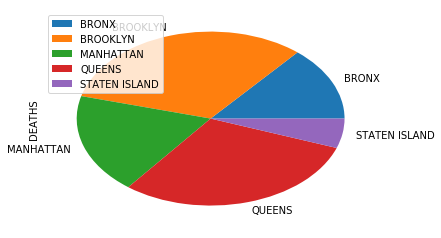

<Figure size 432x288 with 0 Axes>

In [50]:
#deaths_n_injuries.plot(kind="pie", y='DEATHS')
#plt.show()
#plt.tight_layout()

In [11]:
nyc_data['DATE'].value_counts()

01/21/2014    1161
11/15/2018    1064
12/15/2017     999
05/19/2017     974
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     911
01/07/2017     897
03/02/2018     884
12/14/2017     883
09/30/2016     872
11/26/2013     867
11/09/2018     865
04/28/2017     857
03/08/2013     851
10/21/2016     851
06/22/2017     845
06/29/2018     844
12/14/2018     841
03/16/2017     839
06/14/2018     833
10/30/2017     832
10/27/2016     831
03/05/2015     830
10/12/2018     829
06/13/2017     829
09/15/2017     827
10/20/2017     823
09/06/2018     821
              ... 
09/03/2012     373
01/13/2013     373
01/06/2019     372
10/30/2012     372
05/29/2017     371
01/13/2019     370
12/25/2016     365
02/01/2015     361
07/04/2014     360
01/20/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
03/02/2014     344
11/04/2012     344
01/11/2015     341
12/25/2017     333
12/25/2018     329
12/25/2015     321
01/05/2014  

In [13]:
nyc_data['ZIP CODE'].value_counts()

11207.0    11713
11101.0     8897
10019.0     8718
11236.0     8477
10036.0     8308
10016.0     8211
11234.0     8135
10001.0     8122
11203.0     8117
11385.0     8050
11201.0     8000
11226.0     7807
10022.0     7807
11434.0     7631
11212.0     7343
11208.0     7276
10013.0     7228
10002.0     7117
11233.0     6745
11230.0     6687
11206.0     6524
11207       6439
10467.0     6352
11354.0     6322
10018.0     6242
11211.0     6178
11220.0     6114
11368.0     6037
11373.0     5846
11235.0     5773
           ...  
10120.0        7
10170.0        7
10177.0        7
10000          7
10279.0        6
10154.0        6
10115.0        5
11359          5
11695.0        5
10151.0        4
10106.0        4
10103.0        4
11359.0        4
10045.0        4
10171.0        4
10173.0        3
10107.0        3
10152.0        3
10167.0        2
10803          2
10158.0        2
11242.0        2
10122.0        1
11251.0        1
10176.0        1
10048          1
10166.0        1
11241.0       

In [14]:
nyc_data['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313499
Sedan                                   91582
Station Wagon/Sport Utility Vehicle     72115
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Taxi                                     9673
MOTORCYCLE                               6536
Pick-up Truck                            6123
BICYCLE                                  5568
Box Truck                                5269
Bus                                      4347
Bike                                     2609
TK                                       2485
Tractor Truck Diesel              

In [15]:
nyc_data['VEHICLE TYPE CODE 2'].value_counts()

PASSENGER VEHICLE                      537549
SPORT UTILITY / STATION WAGON          237846
UNKNOWN                                 81454
Sedan                                   68862
Station Wagon/Sport Utility Vehicle     56435
TAXI                                    41976
BICYCLE                                 26945
OTHER                                   25785
VAN                                     24397
PICK-UP TRUCK                           21542
SMALL COM VEH(4 TIRES)                  15869
LARGE COM VEH(6 OR MORE TIRES)          13970
BUS                                     11558
LIVERY VEHICLE                           8458
Taxi                                     7841
MOTORCYCLE                               5963
Pick-up Truck                            5608
Box Truck                                5094
Bike                                     3454
Bus                                      3363
TK                                       2754
BU                                

In [16]:
nyc_data['VEHICLE TYPE CODE 3'].value_counts()

PASSENGER VEHICLE                      63654
SPORT UTILITY / STATION WAGON          33161
Sedan                                   6005
Station Wagon/Sport Utility Vehicle     4888
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Taxi                                     392
Pick-up Truck                            354
Box Truck                                121
Bus                                       85
TK                                        73
BU                                        63
Tractor Truck Diesel                      57
Van       

In [17]:
nyc_data['TIME'].value_counts()

16:00    21547
17:00    21157
15:00    20875
18:00    19494
14:00    18929
13:00    17491
19:00    16061
9:00     15925
16:30    15893
12:00    15587
14:30    14890
17:30    14845
8:00     14538
10:00    14414
11:00    14152
18:30    13128
20:00    12765
8:30     12496
13:30    12397
12:30    11889
15:30    11842
9:30     11836
11:30    11327
0:00     10831
10:30    10722
19:30    10659
21:00    10428
22:00     9103
20:30     8297
23:00     7641
         ...  
3:54        60
5:21        60
5:51        60
3:14        59
3:53        59
4:31        58
4:59        58
2:29        57
4:01        57
4:33        56
3:21        56
3:36        56
3:39        55
3:34        55
5:31        55
4:04        55
3:01        54
4:06        54
2:51        54
3:24        53
2:31        53
3:59        52
3:43        52
3:32        52
2:59        50
3:51        50
4:02        50
4:03        48
3:41        47
3:31        39
Name: TIME, Length: 1440, dtype: int64

In [18]:
nyc_data['NUMBER OF PERSONS KILLED'].value_counts()

0.0    1460446
1.0       1589
2.0         39
3.0          7
8.0          1
5.0          1
4.0          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

In [20]:
nyc_data['NUMBER OF PERSONS INJURED'].value_counts()

0.0     1184478
1.0      215108
2.0       40260
3.0       13408
4.0        5103
5.0        2078
6.0         873
7.0         377
8.0         152
9.0          89
10.0         55
11.0         36
12.0         23
13.0         17
16.0          8
14.0          6
15.0          5
19.0          4
17.0          3
18.0          3
22.0          3
24.0          3
27.0          1
20.0          1
32.0          1
43.0          1
31.0          1
Name: NUMBER OF PERSONS INJURED, dtype: int64